#  SIMPLE LINEAR REGRESSION - MODEL

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()
import warnings
warnings.filterwarnings('ignore')
# it took index as a variable too. To solve it:

In [3]:
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#or
#df = df.iloc[:,1:len(df)]
#df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()

False

In [8]:
df.corr()
# positive strong correlation btw TV and Sales

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


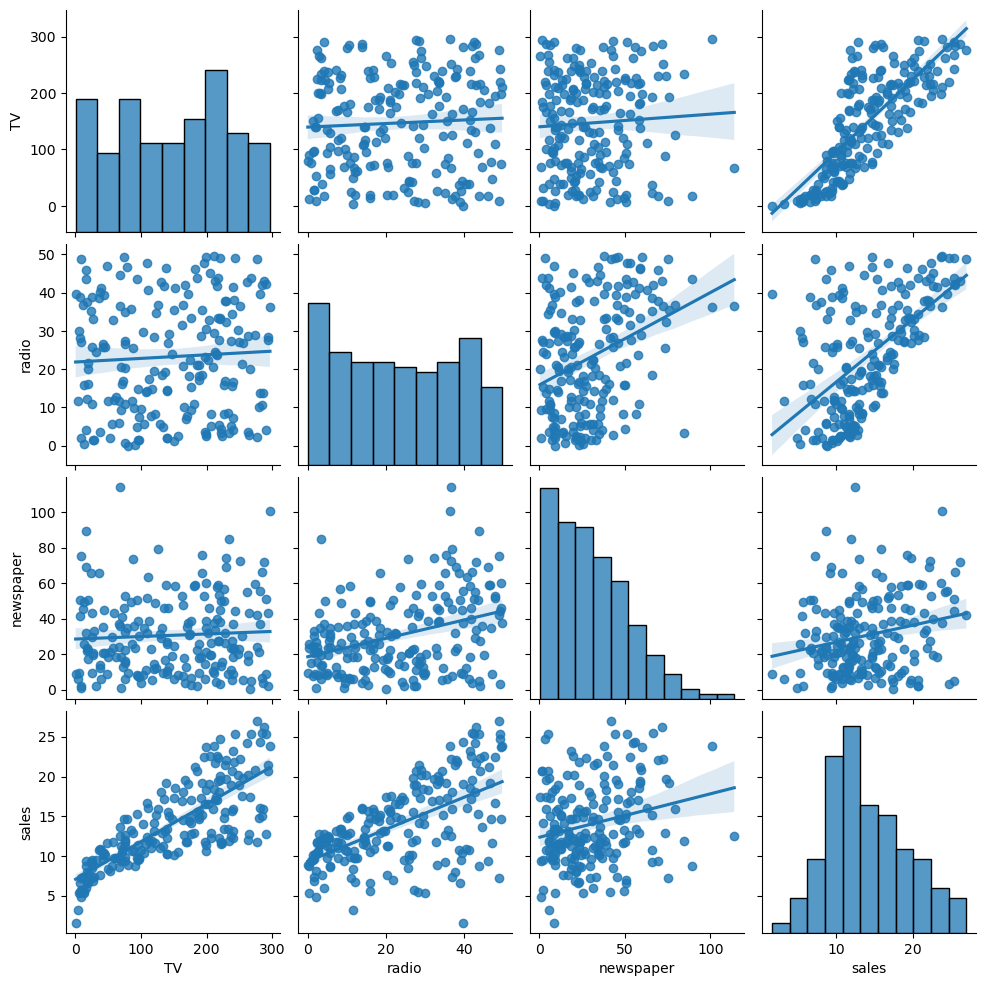

In [9]:
import seaborn as sns
sns.pairplot(df,kind = "reg")

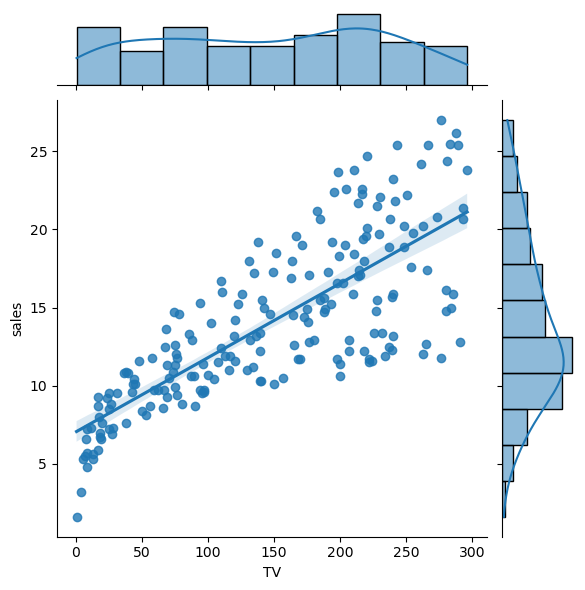

In [10]:
# TV - Sales relation
sns.jointplot(x = "TV", y = "sales", data = df , kind = "reg")

## Statsmodels ile modelleme

In [12]:
import statsmodels.api as sm
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
X = sm.add_constant(X)

In [14]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = df["sales"]

In [16]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
lm = sm.OLS(y,X)

In [18]:
model = lm.fit()

In [19]:
model.summary()
# values have important meanings
#r^2 = explainability
# F statistics = meaningfulness

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.47e-42
Time:                        23:29:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV" , df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.47e-42
Time:                        23:29:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [24]:
model.f_pvalue

1.467389700194647e-42

In [25]:
print("f_pvalue: " , "%.99f" % model.f_pvalue)

f_pvalue:  0.000000000000000000000000000000000000000001467389700194647017280493997234178938762428791151079861612


In [26]:
print("fvalue: " , "%.3f" % model.fvalue)

fvalue:  312.145


In [27]:
print("tvalue: " , "%.3f" % model.tvalues[0:1])

tvalue:  15.360


In [28]:
model.mse_model
# sales mean was 14. average error per unit is too high! its bad

3314.618166868649

In [29]:
model.rsquared

0.611875050850071

In [30]:
model.rsquared_adj

0.6099148238341623

In [31]:
model.fittedvalues[0:5]
# estimated values

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [32]:
y[0:5]
# real values

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Writing Model's Equation

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           1.47e-42
Time:                        23:29:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print("SALES : " + str("%.3f" % model.params[0]) + " + " + "TV * " + str("%.3f" % model.params[1]))

SALES : 7.033 + TV * 0.048


(0.0, 28.27)

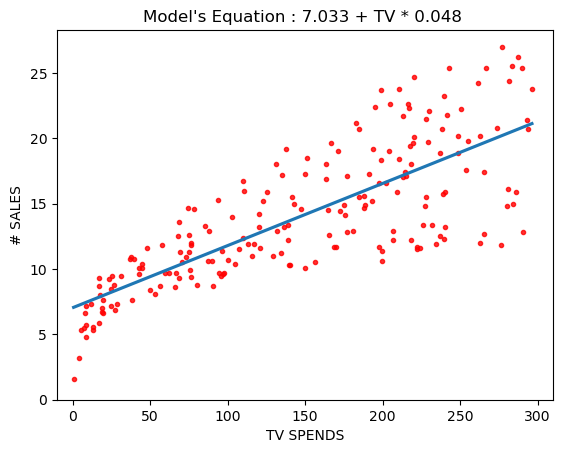

In [36]:
import matplotlib.pyplot as plt
g = sns.regplot(x = "TV" , y="sales",data = df, ci = None, scatter_kws = {'color' : 'r', 's' : 9})
g.set_title("Model's Equation : 7.033 + TV * 0.048 ")
g.set_ylabel("# SALES")
g.set_xlabel("TV SPENDS")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

## Sklearn ile doğrusal model kurma

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
print(model.intercept_ , model.coef_)

[7.03259355] [[0.04753664]]


In [40]:
model.score(X,y)
# r^2 degeri

0.611875050850071

In [41]:
model.predict(X)[0:10]
# model araclıgı ile tahmin edilen degerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

 # SIMPLE LINEAR REGRESSION - Estımate

##### 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [44]:
7.03259355 + 30 * 0.04753664

8.458692749999999

In [45]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)

In [46]:
model.predict([[30]])

array([[8.45869276]])

In [47]:
newData = [[5],[90],[200]]

In [48]:
model.predict(newData)
# estimating for each values

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

# Artıklar ve ML' deki Onemi

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
lm = smf.ols("sales~TV",df)
model = lm.fit()

In [52]:
mse = mean_squared_error(y,model.fittedvalues)

In [53]:
mse
# mean squared error value

10.512652915656753

In [54]:
import numpy as np
rmse = np.sqrt(mse)

In [55]:
rmse

3.2423221486546883

In [56]:
reg.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [57]:
y[0:10]
# gercek degerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [58]:
tahmin_degerler = reg.predict(X)[0:10]
# Bunu dataframe yapıyoruz
tahmin_df = pd.DataFrame(tahmin_degerler,columns = ["tahmin_y"])
real_y = y[0:10] # gercek degerler
k_t = pd.concat([tahmin_df,real_y],axis = 1)
k_t

,tahmin_y,sales
0,17.970775,22.1
1,9.147974,10.4
2,7.850224,9.3
3,14.234395,18.5
4,15.627218,12.9
5,7.446162,7.2
6,9.765950,11.8
7,12.746498,13.2
8,7.441409,4.8
9,16.530414,10.6


In [59]:
k_t["hata"] = k_t["sales"] - k_t["tahmin_y"]

In [60]:
k_t

,tahmin_y,sales,hata
0,17.970775,22.1,4.129225
1,9.147974,10.4,1.252026
2,7.850224,9.3,1.449776
3,14.234395,18.5,4.265605
4,15.627218,12.9,-2.727218
5,7.446162,7.2,-0.246162
6,9.765950,11.8,2.034050
7,12.746498,13.2,0.453502
8,7.441409,4.8,-2.641409
9,16.530414,10.6,-5.930414


In [61]:
k_t["hata_kare"] = k_t ["hata"] ** 2

In [62]:
k_t

,tahmin_y,sales,hata,hata_kare
0,17.970775,22.1,4.129225,17.050503
1,9.147974,10.4,1.252026,1.567569
2,7.850224,9.3,1.449776,2.101851
3,14.234395,18.5,4.265605,18.195390
4,15.627218,12.9,-2.727218,7.437719
5,7.446162,7.2,-0.246162,0.060596
6,9.765950,11.8,2.034050,4.137358
7,12.746498,13.2,0.453502,0.205664
8,7.441409,4.8,-2.641409,6.977040
9,16.530414,10.6,-5.930414,35.169814


In [63]:
np.sum(k_t["hata_kare"])
# toplam hata

92.90350329638105

In [64]:
np.mean(k_t["hata_kare"])
# hata kare ort
#mse

9.290350329638105

In [65]:
np.sqrt(np.mean(k_t["hata_kare"]))
# hata kare ort karekoku degeri
#rmse

3.048007599996776

In [66]:
model.resid[0:10]
# artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

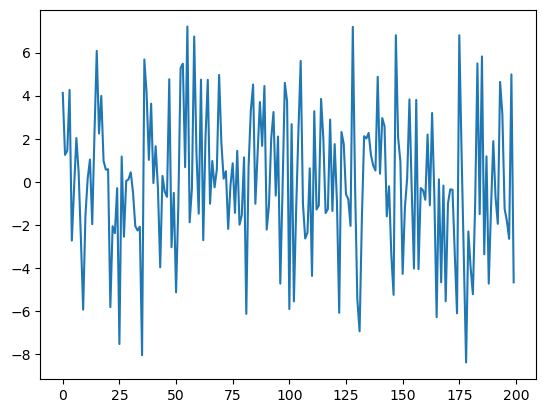

In [67]:
plt.plot(model.resid)
# en uçlardaki degelere gidip bakarak neden bu kadar artık çıktıgını anlayarak daha başarılı işler yapabiliriz